<h1 style="color:rgb(0,120,170)">Assignment 3: Expectation Maximization</h1>
<h2 style="color:rgb(0,120,170)">Machine Learning: Theoretical Concepts, SS 2019</h2>

<h3 style="color:rgb(0,120,170)">Deadline April 09th 2019, 24:00</h3>
Return this notebook with your code and answers.

# Exercise 3

<h3 style="color:rgb(0,120,170)"> Question 3.1 </h3>

This question is meant to give you some more theoretical insights into the EM algorithm.
As you have seen in the lecture, when doing EM you improve the log likelihood of the data $\sum_i^N \mathsf{log} p(\mathbf{x}^i\mid \mathbf{\Theta})$ by introducing a distribution $Q(\mathbf{u})$ on hidden variables $\mathbf{u}$. Then, instead of maximizing the log likelihood directly, you maximize a lower bound which is obtained through Jensen's inequality. We have:
\begin{align}
\sum_i^N \mathsf{log} p(\mathbf{x}^i) \geq \sum_i^N \int Q(\mathbf{u}) \mathsf{log} \frac{p(\mathbf{x}^i, \mathbf{u})}{Q(\mathbf{u})}d\mathbf{u} \ .
\end{align}
Show that after each E-step in the EM algorithm, this lower bound is reached with equality ("the bound is tight").

* <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>


## Assumptions 
According to lecture slides: 
\begin{align*}
\ln \mathcal{L}(\{x \}; \mathcal{w}) \ge \mathcal{F}(\mathcal{Q}, \mathcal{w})
\end{align*}

And we want to show (tightness of bound): 
\begin{align*}
\ln \mathcal{L}(\{x \}; \mathcal{w}) = \mathcal{F}(\mathcal{Q}, \mathcal{w})
\end{align*}
holds after $k$ steps: 

\begin{align*}
\ln \mathcal{L}(\{x \}; \mathcal{w_k}) &= \mathcal{F}(\mathcal{Q_{k+1}}, \mathcal{w_k}) \\
\ln \mathcal{L}(\{x \}; \mathcal{w_k}) &= \mathcal{F}(\mathcal{Q_{k+1}}(\mathcal{u} ~|~ \{ x \}); \mathcal{w_k}) \\
\\
\mathcal{Q_{k+1}}(\mathcal{u} ~|~ \{ \mathcal{x} \}) &= \mathcal{p}(\mathcal{u} ~|~ \{ \mathcal{x} \}; \mathcal{w}_k)
\end{align*}

## Calculation 

\begin{align*}
\ln \mathcal{L}(\{x \}; \mathcal{w_k}) &= \mathcal{F}(\mathcal{Q_k}(\mathcal{u} ~|~ \{ \mathcal{x} \}); \mathcal{w_k}) \\
&= \int_U \mathcal{Q_k}(\mathcal{u} ~|~ \{ \mathcal{x} \}) \ln \frac{\mathcal{p} (\{ \mathcal{x} \}, \mathcal{u}; \mathcal{w_k})}{\mathcal{Q}(\mathcal{u} ~|~ \{ \mathcal{x} \})} \delta \mathcal{u} \\
&= \int_U \mathcal{Q_k}(\mathcal{u} ~|~ \{ \mathcal{x} \}) \ln \frac{\mathcal{p} (\{ \mathcal{x} \}, \mathcal{u}; \mathcal{w_k})}{\mathcal{Q}(\mathcal{u} ~|~ \{ \mathcal{x} \})} \delta \mathcal{u}  + \ln \mathcal{p}(\{ \mathcal{x} \}; \mathcal{w_k}) \\
&= \int_U \mathcal{Q_k}(\mathcal{u} ~|~ \{ \mathcal{x} \}) \ln \frac{\mathcal{p} (\{ \mathcal{x} \}, \mathcal{u}; \mathcal{w_k})}{\mathcal{Q}(\mathcal{u} ~|~ \{ \mathcal{x} \})} \delta \mathcal{u}  + \ln \mathcal{L}(\{ \mathcal{x} \}; \mathcal{w_k}) \\
&= - \int_U \mathcal{Q_k}(\mathcal{u} ~|~ \{ \mathcal{x} \}) \ln \frac{\mathcal{Q}(\mathcal{u} ~|~ \{ \mathcal{x} \})}{\mathcal{p} (\{ \mathcal{x} \}, \mathcal{u}; \mathcal{w_k})} \delta \mathcal{u}  + \ln \mathcal{L}(\{ \mathcal{x} \}; \mathcal{w_k}) \\
&= \ln \mathcal{L}(\{ \mathcal{x} \}; \mathcal{w_k}) - \underbrace{\mathcal{D}_{KL}(\mathcal{Q} || \mathcal{p})}_\text{$\ge 0$; $=0$ for $\mathcal{Q}(\mathcal{u} ~|~ \{\mathcal{x}\}) = \mathcal{p}( \mathcal{u} ~|~ \{ \mathcal{x} \}; \mathcal{w_k})$}
\end{align*}

We see that this equality holds if and only if $\mathcal{D}_{KL}(\mathcal{Q} || \mathcal{p}) = 0$:

\begin{align*}
\mathcal{F}(\mathcal{Q_{k+1}}(\mathcal{u} ~|~ \{ x \}); \mathcal{w_k}) &= \ln \mathcal{L}(\{x \}; \mathcal{w_k}) \\
&= \ln \mathcal{L}(\{ \mathcal{x} \}; \mathcal{w_k}) - \mathcal{D}_{KL}(\mathcal{Q} || \mathcal{p}) \\
&= \ln \mathcal{L}(\{ \mathcal{x} \}; \mathcal{w_k}) - \int_U \mathcal{Q}_{k+1}(\mathcal{u} ~|~ \{ \mathcal{x} \}) \ln \frac{\mathcal{Q}_{k+1}(\mathcal{u} ~|~ \{ \mathcal{x} \})}{\mathcal{p} (\{ \mathcal{x} \}, \mathcal{u}; \mathcal{w_k})} \delta \mathcal{u} \\
&= \ln \mathcal{L}(\{ \mathcal{x} \}; \mathcal{w_k}) - \int_U \mathcal{Q}_{k+1}(\mathcal{u} ~|~ \{ \mathcal{x} \}) \ln \frac{\mathcal{p} (\{ \mathcal{x} \}, \mathcal{u}; \mathcal{w_k})}{\mathcal{p} (\{ \mathcal{x} \}, \mathcal{u}; \mathcal{w_k})} \delta \mathcal{u} \\
&= \ln \mathcal{L}(\{ \mathcal{x} \}; \mathcal{w_k}) - \int_U \mathcal{Q}_{k+1}(\mathcal{u} ~|~ \{ \mathcal{x} \}) \ln 1 \delta \mathcal{u} \\
&= \ln \mathcal{L}(\{ \mathcal{x} \}; \mathcal{w_k}) - \int_U \mathcal{Q}_{k+1}(\mathcal{u} ~|~ \{ \mathcal{x} \}) 0 \delta \mathcal{u} \\
&= \ln \mathcal{L}(\{ \mathcal{x} \}; \mathcal{w_k}) - 0 \\
&= \ln \mathcal{L}(\{ \mathcal{x} \}; \mathcal{w_k})
\end{align*}

<h3 style="color:rgb(0,120,170)"> Question 3.2 </h3>

Derive update formulas for the Mixture of Poissons problem shown in class. This means: update formulas for the $r_{ik}$, $\alpha_k$ and $\theta_k$ (the rate parameter) to be used in the E- and M-steps.
Note that most of the formulas derived in class for the Mixture of Gaussians problem can be reused, as they are not specific to the Gaussian distribution, but for a Mixture Model in general.

* <span style="color:rgb(0,120,170)">**TODO:** Markdown / Latex</span>

First we update the formula for $\theta_k$:
\begin{align*}
\frac{\partial \ln \mathcal{L}}{\partial \theta_k} &= \sum_i^n \frac{\alpha_k}{\sum_l^K \alpha_l \mathcal{p}(x_i; \theta_l)} \frac{\partial p(x_i; \theta_k)}{\partial \theta_k}\\
&= \sum_i^n p(u_i ~=~ k|x_i) \frac{\partial \ln p(x_i; \theta_k)}{\partial \theta_k}
\end{align*}

We also know that for the Poisson distribution there is just one parameter to optimize:

\begin{align*}
\frac{\partial}{\partial \lambda_k} \ln p(x_i; \lambda_k) &= \frac{\partial}{\partial \lambda_k} \ln \frac{\lambda_k^{x_i}}{x_i!} \mathcal{e}^{-\lambda_k} \\
&= \frac{\partial}{\partial \lambda_k} \ln(\frac{\lambda_k^{x_i}}{x_i!}) - \lambda_k \\
&= \frac{\partial}{\partial \lambda_k} \ln(\lambda_k^{x_i}) - \ln(x_i!) - \lambda_k \\
&= \frac{\partial}{\partial \lambda_k} x_i\ln(\lambda_k) - \ln(x_i!) - \lambda_k \\
&= \frac{x_i}{\lambda_k} - 1
\end{align*}

Setting it to zero gives us:
\begin{align*}
\frac{x_i}{\lambda_k} - 1 &= 0 \\
\frac{x_i}{\lambda_k} &= 1 \\
\lambda_k &= x_i
\end{align*}

Going back to the original formula, we now have: 
\begin{align*}
\sum_i^n p(u_i ~=~ k|x_i) \frac{\partial \ln p(x_i; \theta_k)}{\partial \theta_k} &= \sum_i^n p(u_i ~=~ k|x_i) (\frac{x_i}{\lambda_k} - 1)
\end{align*}

We also set this to 0: 

\begin{align*}
\sum_i^n p(u_i ~=~ k|x_i) (\frac{x_i}{\lambda_k} - 1) &= 0 \\
\sum_i^n r_{ik} (\frac{x_i}{\lambda_k} - 1) &= 0 \\
\sum_i^n r_{ik} \frac{x_i}{\lambda_k} - \sum_i^n r_{ik} &= 0 \\
\sum_i^n r_{ik} x_i - \sum_i^n r_{ik}\lambda_k  &= 0 \\
\sum_i^n r_{ik} x_i &= \sum_i^n r_{ik}\lambda_k \\
\lambda_k &= \frac{\sum_i^n r_{ik} x_i}{\sum_i^n r_{ik}} 
\end{align*}

Lagrangian of the log-likelihood and the sum-to-one constraint (according to exercise slides):

\begin{align*}
\Lambda(\Theta, \lambda) = \sum_i^n \ln\big(\sum_l^K \alpha_l p(x_i; \theta_l) \big) + \lambda \big( \sum_l^K a_l - 1 \big) 
\end{align*}

\begin{align*}
\frac{\partial \Lambda(\Theta, \lambda)}{\partial \alpha_k} = \sum_i^n \frac{p(x_i; \theta_k)}{\sum_l^m \alpha_l p(x_i; \theta_l)} + \lambda &= 0 \\
\sum_i^n p(u_i ~=~ k|x_i) + \alpha_k \lambda &= 0 \\
\sum_i^n \underbrace{\sum_k^K p(u_i ~=~ k|x_i)}_\text{sums up to 1} + \lambda \underbrace{\sum_k^K \alpha_k}_\text{sums up to 1} &= 0 \\
\sum_i^n 1 &= - \lambda \\
\lambda &= -n \implies \alpha_k = \frac{1}{n} \sum_i^n p(u_i = k | x_i)
\end{align*}

For $r_{ik}$:

\begin{align*}
r_{ik} &= p(u_i k | x_i) \\
&= \frac{p(u_i = k) p(x_i | u_i = k)}{p(x_i)} \\
&= \frac{\alpha_k p(x_i; \theta_k)}{\sum_l^K \alpha_l p(x_i; \theta_l)} \\
&= \frac{\alpha_k \frac{\lambda_k^{x_i}}{x_i!} \mathcal{e}^{-\lambda_k}}{\sum_l^K \alpha_l \frac{\lambda_k^{x_i}}{x_i!} \mathcal{e}^{-\lambda_k}}
\end{align*}

<h3 style="color:rgb(0,120,170)"> Question 3.3 </h3>


Write a program that estimates all the parameters of a Mixture of Poissons via an EM algorithm. Use the derivations from exercise 3.2. Choose (and document!) your own convergence criterion. Then, let your algorithm run on the data from $\mathsf{cnvdata.csv}$.
Try different values for $K$, the number of components.
For each $K$, run different experiments with different random initializations.

How many different copy numbers (i.e. components or clusters) do you think are in the data? What do you observe, and how do different values of $K$ change the results of your algorithm?

* <span style="color:rgb(0,120,170)">**TODO:** Markdown / Latex</span>

Initially I thought that there are **clearly** 3 underlying poisson distributions (~50, ~90, ~185). Upon further inspection there might be 2 different distributions around X=90.

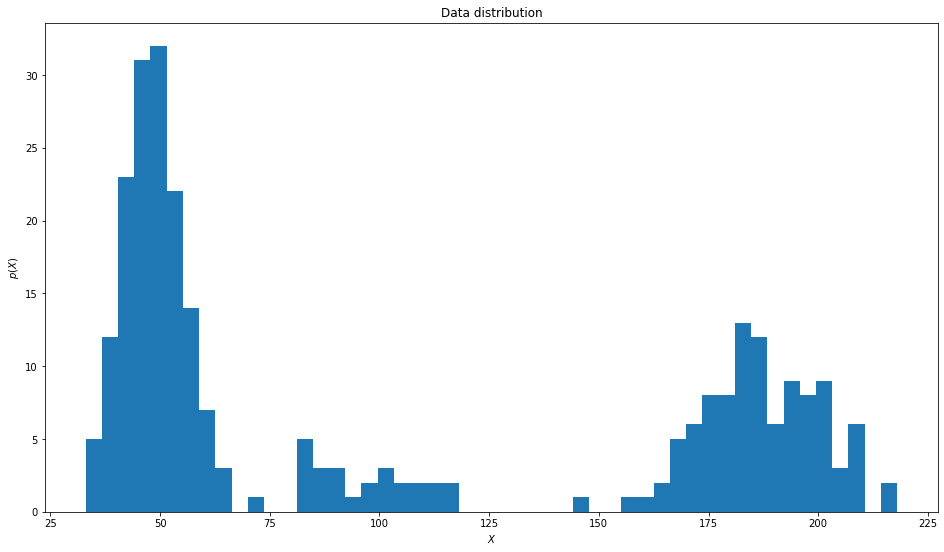

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(open("cnvdata.csv", "rb"), delimiter=",", skiprows=1)

plt.figure(figsize=(16, 9))
plt.hist(data, bins=50)
plt.title('Data distribution')
plt.ylabel('$p(X)$')
plt.xlabel('$X$')
plt.show()

### Implementation

* <span style="color:rgb(0,120,170)">**TODO:** Implement your EM algorithm using the updates rules derived in the previous exercise.</span>

In [2]:
class EM:
    def __init__(self, X, K, max_iter, verbose=False):
        self.X = X
        self.K = K
        self.max_iter = max_iter
        self.verbose = verbose

    def poisson(self, l, x_i):
        return stats.poisson(l).pmf(x_i)

    def alpha_optimize(self, R_ik, k) -> np.real:
        """Optimizing for one alpha in k-th column"""
        return R_ik[:, k].sum() / len(R_ik)

    def alphas(self, R_ik) -> [np.real]:
        """Optimizing over all alphas"""
        return np.asarray([self.alpha_optimize(R_ik, k) for k in range(R_ik.shape[1])])

    def lambda_optimize(self, R_ik, X, k) -> np.real:
        """Optimizing for one lambda_k:
        lambda_k = sum(R_ik * x_i) / sum(R_ik)"""
        return (R_ik[:, k] * X).sum() / R_ik[:, k].sum()

    def lambdas(self, R_ik, X) -> [np.real]:
        """Optimizing over all lambdas"""
        return np.asarray([self.lambda_optimize(R_ik, X, k) for k in range(R_ik.shape[1])])

    def r_ik_optimize(self, X, i, K, k, L, A) -> [np.real, np.real]:
        """Optimizing for one r_ik"""
        return A[k] * self.poisson(L[k], X[i]) / np.asarray(
            [A[l] * self.poisson(lam, X[i]) for l, lam in zip(range(K), L)]).sum()

    def M_step(self, R_ik, X):
        return self.alphas(R_ik), self.lambdas(R_ik, X)

    def E_step_initial(self):
        return np.random.rand(self.X.shape[0], self.K)

    def E_step(self, X, K, L, A):
        R_ik = np.zeros((X.shape[0], K))
        # Iterating over all x_i
        for i in range(X.shape[0]):
            # iterating over all ks
            for k in range(K):
                R_ik[i, k] = self.r_ik_optimize(X, i, K, k, L, A)
        return R_ik

    def does_converge(self, L_curr, L_prev) -> bool:
        return np.allclose(L_curr, L_prev, rtol=1e-06, atol=1e-06)

    def EM(self):
        L_curr = np.zeros(self.K)
        R_ik = self.E_step_initial()

        for i in range(self.max_iter):
            if self.verbose:
                print(f'Iteration {i + 1}/{self.max_iter}')
            L_prev = L_curr.copy()
            A, L_curr = self.M_step(R_ik, self.X)
            R_ik = self.E_step(self.X, self.K, L_curr, A)
            if self.does_converge(L_curr, L_prev):
                if self.verbose:
                    print(f'EM reached convergence in step {i + 1}!')
                return A, L_curr

        return L_curr, A 

    def __str__(self):
        result = self.EM()
        result_as_list = [(l, a) for l, a in zip(result[0], result[1])]
        result_sorted = np.asarray(sorted(result_as_list))
        return f'Lambdas: {result_sorted[:, 0]}\nAlphas: {result_sorted[:, 1]}'

### Behaviour of the Algorithm

In [3]:
print(EM(data, 3, 5))

Lambdas: [ 48.34256499  93.44427824 186.97168677]
Alphas: [0.53414834 0.10217218 0.36367948]


For $\mathcal{K} = 3$ the algorithm picks up each of the "bumps" as was to be expected. 

In [4]:
print(EM(data, 6, 5))

Lambdas: [ 48.30901046  59.36037511  88.18334807 102.45873728 109.61549339
 187.03072453]
Alphas: [0.52767064 0.01714872 0.04088731 0.03888047 0.01220549 0.36320737]


For $\mathcal{K} = 6$ the algorithm picks up multiple distributions for each visible "bump". 

In [5]:
print(EM(data, 10, 5))

Lambdas: [ 47.86718482  49.02583478  54.06497217  88.84626416 100.38275511
 107.52577761 174.88253683 183.67873675 186.20316881 190.37242509]
Alphas: [0.34011717 0.16926133 0.03492068 0.04004609 0.03348921 0.01864175
 0.02504023 0.0667347  0.09445967 0.17728917]


For $\mathcal{K} \ge 10$ the algorithm tends to overfit every statistical anomality into its own distribution.

### Testing for 4 components

* <span style="color:rgb(0,120,170)">**TODO:** Test your implementation for 4 components</span>

We see that the first and second distribution (~48.5 and ~187) are almost always picked up for $\mathcal{K} =4$. The other two distributions fluctuate immensly between adding a second distribution near the first and last distribution and picking up on two distributions in between:

In [6]:
print(EM(data, 4, 4))

Lambdas: [ 47.83534053  50.45338699  97.00948568 186.98132198]
Alphas: [0.37477881 0.17030652 0.09128953 0.36362514]


In [7]:
print(EM(data, 4, 8))

Lambdas: [ 48.61940969  91.16648483 106.59129791 187.00303894]
Alphas: [0.54419492 0.0584109  0.03395274 0.36344144]


In [8]:
print(EM(data, 4, 12))

Lambdas: [ 48.6069794   88.8900196  104.53356741 186.9945973 ]
Alphas: [0.54384751 0.04643465 0.046205   0.36351284]


In [9]:
print(EM(data, 4, 16))

Lambdas: [ 48.49218306  51.10126501  96.97258492 186.98114121]
Alphas: [0.51237555 0.03258357 0.09141421 0.36362667]


In [10]:
print(EM(data, 4, 20))

Lambdas: [ 48.61123158  89.68357381 105.26871846 186.9975237 ]
Alphas: [0.54396808 0.05062697 0.04191686 0.36348809]
